In [1]:
import geopandas as gpd
from mongodb.content_provider import ContentProvider
from shapely.geometry import mapping
from pymongo.errors import OperationFailure
import re

In [2]:
data = gpd.read_file('./data/mars_mro_crism_trdr_ga/mars_mro_crism_trdr_ga.shp')
data

,CenterLat,CenterLon,MaxLat,MinLat,EastLon,WestLon,EmAngle,InAngle,PhAngle,SolLong,...,ExtURL,Ext2URL,Ext3URL,ProdURL,FilesURL,LabelURL,PILOTURL,ODEId,SubSiteTag,geometry
0,-44.9007,312.5503,-44.8088,-44.9909,312.8145,312.2682,68.462059,76.760025,128.148773,49.334265,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,14729930,None,"POLYGON ((312.80421 -44.81027, 312.80730 -44.8..."
1,-44.9007,312.5503,-44.8088,-44.9909,312.8145,312.2682,68.462059,76.760025,128.148773,49.334265,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,14729930,None,"POLYGON ((312.29250 -44.99090, 312.42480 -44.9..."
2,-44.9007,312.5503,-44.8088,-44.9909,312.8145,312.2682,68.462059,76.760025,128.148773,49.334265,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,14729932,None,"POLYGON ((312.80421 -44.81027, 312.80730 -44.8..."
3,-44.9007,312.5503,-44.8088,-44.9909,312.8145,312.2682,68.462059,76.760025,128.148773,49.334265,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,14729932,None,"POLYGON ((312.29250 -44.99090, 312.42480 -44.9..."
4,-45.0033,312.5289,-44.9291,-45.0771,312.7581,312.3022,61.764812,76.879745,123.953552,49.334424,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,14729933,None,"POLYGON ((312.75810 -45.02930, 312.64640 -45.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720513,75.8617,139.3325,75.9585,75.7644,139.8135,138.8476,0.110101,64.650948,64.601517,33.408963,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,16553243,None,"POLYGON ((139.81350 75.80690, 139.60150 75.796..."
720514,25.7946,333.1947,25.9244,25.6647,333.3316,333.0464,8.014198,46.693932,38.804195,111.785839,...,http://crism-map.jhuapl.edu/summary.php?obs=FR...,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,16553249,None,"POLYGON ((333.33160 25.71280, 333.26710 25.700..."
720515,-67.8449,163.1923,-67.7131,-67.9756,163.7151,162.6907,67.892670,58.617767,35.759544,320.902742,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,16553253,None,"POLYGON ((163.62670 -67.71310, 163.38760 -67.7..."
720516,-39.9185,309.5682,-39.8670,-39.9698,309.7308,309.4005,50.616402,56.065990,55.347305,212.100603,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,16553254,None,"POLYGON ((309.72960 -39.92140, 309.64790 -39.9..."


In [3]:
data["_id"] = 'mars_mro_ctx_edr_c0a_' + data.index.astype(str)
data

,CenterLat,CenterLon,MaxLat,MinLat,EastLon,WestLon,EmAngle,InAngle,PhAngle,SolLong,...,Ext2URL,Ext3URL,ProdURL,FilesURL,LabelURL,PILOTURL,ODEId,SubSiteTag,geometry,_id
0,-44.9007,312.5503,-44.8088,-44.9909,312.8145,312.2682,68.462059,76.760025,128.148773,49.334265,...,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,14729930,None,"POLYGON ((312.80421 -44.81027, 312.80730 -44.8...",mars_mro_ctx_edr_c0a_0
1,-44.9007,312.5503,-44.8088,-44.9909,312.8145,312.2682,68.462059,76.760025,128.148773,49.334265,...,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,14729930,None,"POLYGON ((312.29250 -44.99090, 312.42480 -44.9...",mars_mro_ctx_edr_c0a_1
2,-44.9007,312.5503,-44.8088,-44.9909,312.8145,312.2682,68.462059,76.760025,128.148773,49.334265,...,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,14729932,None,"POLYGON ((312.80421 -44.81027, 312.80730 -44.8...",mars_mro_ctx_edr_c0a_2
3,-44.9007,312.5503,-44.8088,-44.9909,312.8145,312.2682,68.462059,76.760025,128.148773,49.334265,...,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,14729932,None,"POLYGON ((312.29250 -44.99090, 312.42480 -44.9...",mars_mro_ctx_edr_c0a_3
4,-45.0033,312.5289,-44.9291,-45.0771,312.7581,312.3022,61.764812,76.879745,123.953552,49.334424,...,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,14729933,None,"POLYGON ((312.75810 -45.02930, 312.64640 -45.0...",mars_mro_ctx_edr_c0a_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720513,75.8617,139.3325,75.9585,75.7644,139.8135,138.8476,0.110101,64.650948,64.601517,33.408963,...,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,16553243,None,"POLYGON ((139.81350 75.80690, 139.60150 75.796...",mars_mro_ctx_edr_c0a_720513
720514,25.7946,333.1947,25.9244,25.6647,333.3316,333.0464,8.014198,46.693932,38.804195,111.785839,...,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,16553249,None,"POLYGON ((333.33160 25.71280, 333.26710 25.700...",mars_mro_ctx_edr_c0a_720514
720515,-67.8449,163.1923,-67.7131,-67.9756,163.7151,162.6907,67.892670,58.617767,35.759544,320.902742,...,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,16553253,None,"POLYGON ((163.62670 -67.71310, 163.38760 -67.7...",mars_mro_ctx_edr_c0a_720515
720516,-39.9185,309.5682,-39.8670,-39.9698,309.7308,309.4005,50.616402,56.065990,55.347305,212.100603,...,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,16553254,None,"POLYGON ((309.72960 -39.92140, 309.64790 -39.9...",mars_mro_ctx_edr_c0a_720516


In [4]:
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]
data

,_id,CenterLat,CenterLon,MaxLat,MinLat,EastLon,WestLon,EmAngle,InAngle,PhAngle,...,ExtURL,Ext2URL,Ext3URL,ProdURL,FilesURL,LabelURL,PILOTURL,ODEId,SubSiteTag,geometry
0,mars_mro_ctx_edr_c0a_0,-44.9007,312.5503,-44.8088,-44.9909,312.8145,312.2682,68.462059,76.760025,128.148773,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,14729930,None,"POLYGON ((312.80421 -44.81027, 312.80730 -44.8..."
1,mars_mro_ctx_edr_c0a_1,-44.9007,312.5503,-44.8088,-44.9909,312.8145,312.2682,68.462059,76.760025,128.148773,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,14729930,None,"POLYGON ((312.29250 -44.99090, 312.42480 -44.9..."
2,mars_mro_ctx_edr_c0a_2,-44.9007,312.5503,-44.8088,-44.9909,312.8145,312.2682,68.462059,76.760025,128.148773,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,14729932,None,"POLYGON ((312.80421 -44.81027, 312.80730 -44.8..."
3,mars_mro_ctx_edr_c0a_3,-44.9007,312.5503,-44.8088,-44.9909,312.8145,312.2682,68.462059,76.760025,128.148773,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,14729932,None,"POLYGON ((312.29250 -44.99090, 312.42480 -44.9..."
4,mars_mro_ctx_edr_c0a_4,-45.0033,312.5289,-44.9291,-45.0771,312.7581,312.3022,61.764812,76.879745,123.953552,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,14729933,None,"POLYGON ((312.75810 -45.02930, 312.64640 -45.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720513,mars_mro_ctx_edr_c0a_720513,75.8617,139.3325,75.9585,75.7644,139.8135,138.8476,0.110101,64.650948,64.601517,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,16553243,None,"POLYGON ((139.81350 75.80690, 139.60150 75.796..."
720514,mars_mro_ctx_edr_c0a_720514,25.7946,333.1947,25.9244,25.6647,333.3316,333.0464,8.014198,46.693932,38.804195,...,http://crism-map.jhuapl.edu/summary.php?obs=FR...,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,16553249,None,"POLYGON ((333.33160 25.71280, 333.26710 25.700..."
720515,mars_mro_ctx_edr_c0a_720515,-67.8449,163.1923,-67.7131,-67.9756,163.7151,162.6907,67.892670,58.617767,35.759544,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,16553253,None,"POLYGON ((163.62670 -67.71310, 163.38760 -67.7..."
720516,mars_mro_ctx_edr_c0a_720516,-39.9185,309.5682,-39.8670,-39.9698,309.7308,309.4005,50.616402,56.065990,55.347305,...,None,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://pds-geosciences.wustl.edu/mro/mro-m-cr...,None,16553254,None,"POLYGON ((309.72960 -39.92140, 309.64790 -39.9..."


<AxesSubplot:>

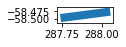

In [5]:
data.loc[[163],'geometry'].plot(figsize=(1, 100))

In [ ]:
data['geometry'] = data['geometry'].apply(lambda x:mapping(x))
data

In [ ]:
data["geometry"].iloc[1]

In [ ]:
contentProvider = ContentProvider("mongo_test", "geodata")
contentProvider.delete_data()
contentProvider.insert_data(data)

In [ ]:
#contentProvider.create_2dsphere_index("geometry")

In [ ]:
broken_values = []
def index_locator():
    try:
        contentProvider.create_2dsphere_index("geometry")
    except OperationFailure as e:
        index = re.search('_id: "(.*)"', str(e))
        index = index.group(1).split('"',1)
        broken_values.append(index[0])
        print(index[0])
        broken_value ={"_id" : index[0]}
        contentProvider.delete_data(broken_value)
        index_locator()

index_locator()

In [ ]:
prit(a)